In [1]:
#1.Rock-Paper-Scissors Images dataset contains images of hand gestures from the Rock Paper-Scissors game. 
#The dataset contains 750 images of rock, paper and scissors,respectively. You can load the dataset and split the data by:

In [1]:
! unzip rps-cv-images.zip
import os
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import random
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
dir = "./rps-cv-images"
labels = ["rock","paper","scissors"]
dataset = []
count = 0
for label in labels :
    folder = os.path.join (dir,label)
    for image in os.listdir(folder):
        img = load_img(os.path.join(folder,image),
              target_size =(150 ,150))
        img = img_to_array(img)
        img = img/255.0
        dataset.append((img,count))
    print ( f'\rCompleted: {label}',end= '')
    count +=1
random.shuffle(dataset)
X,y = zip(*dataset)
X,y = np.array(X),np.array(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.22,random_state =42)
y_train = tf.one_hot (y_train.astype(np.int32),depth =3)
y_test = tf.one_hot (y_test.astype(np.int32),depth =3)

Archive:  rps-cv-images.zip
   creating: rps-cv-images/paper/
  inflating: rps-cv-images/paper/04l5I8TqdzF9WDMJ.png  
  inflating: rps-cv-images/paper/0a3UtNzl5Ll3sq8K.png  
  inflating: rps-cv-images/paper/0cb6cVL8pkfi4wF6.png  
  inflating: rps-cv-images/paper/0eqArS2GgsBeqgSn.png  
  inflating: rps-cv-images/paper/0Og76sl5CJhbxWWx.png  
  inflating: rps-cv-images/paper/0RA9rcrv8iVvuDDU.png  
  inflating: rps-cv-images/paper/0t08v9bAaA0mXGCQ.png  
  inflating: rps-cv-images/paper/0Uomd0HvOB33m47I.png  
  inflating: rps-cv-images/paper/0vugygEjxQJPr9yz.png  
  inflating: rps-cv-images/paper/0zKU6wEhT2cDe9j0.png  
  inflating: rps-cv-images/paper/14K62H4KG1hg5qiJ.png  
  inflating: rps-cv-images/paper/1Dfw5FRlS4h60JPX.png  
  inflating: rps-cv-images/paper/1fKclJk4eBWOQSR1.png  
  inflating: rps-cv-images/paper/1Frbe8cdOdkciOBg.png  
  inflating: rps-cv-images/paper/1jHtb93pI8f6pfKo.png  
  inflating: rps-cv-images/paper/1oKnUgV2CdCaQUUX.png  
  inflating: rps-cv-images/paper/1Tt9U9Szr


Completed: scissors

In [ ]:
#(1) Build a CNN and train the CNN with validation split=0.1, batch size=32 and 80 epochs  (converge>95%) 

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
keras.utils.set_random_seed(2023)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [3]:
batch_size=32
num_classes=3
epochs=35
model.compile(loss='categorical_crossentropy', metrics=['acc'])
history=model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1)
test_loss, test_accuracy=model.evaluate(X_test, y_test)
print('Accuracy: ', test_accuracy, '\nTest Loss: ', test_loss)


Epoch 1/35


48/48 [==============================] - 31s 630ms/step - loss: 10.5300 - acc: 0.4417 - val_loss: 0.6060 - val_acc: 0.7778
Epoch 2/35
48/48 [==============================] - 34s 720ms/step - loss: 0.7183 - acc: 0.7296 - val_loss: 0.4391 - val_acc: 0.8421
Epoch 3/35
48/48 [==============================] - 46s 954ms/step - loss: 0.4559 - acc: 0.8352 - val_loss: 0.6431 - val_acc: 0.7251
Epoch 4/35
48/48 [==============================] - 42s 869ms/step - loss: 0.3165 - acc: 0.8866 - val_loss: 0.3900 - val_acc: 0.8889
Epoch 5/35
48/48 [==============================] - 41s 849ms/step - loss: 0.2041 - acc: 0.9388 - val_loss: 0.7201 - val_acc: 0.7251
Epoch 6/35
48/48 [==============================] - 44s 926ms/step - loss: 0.1486 - acc: 0.9492 - val_loss: 0.1463 - val_acc: 0.9532
Epoch 7/35
48/48 [==============================] - 51s 1s/step - loss: 0.1155 - acc: 0.9642 - val_loss: 0.3165 - val_acc: 0.8655
Epoch 8/35
48/48 [==============================] - 44s 922ms/step -

In [ ]:
#Plot the training and validation accuracy against number of epochs and the training and validation loss against number of epochs.

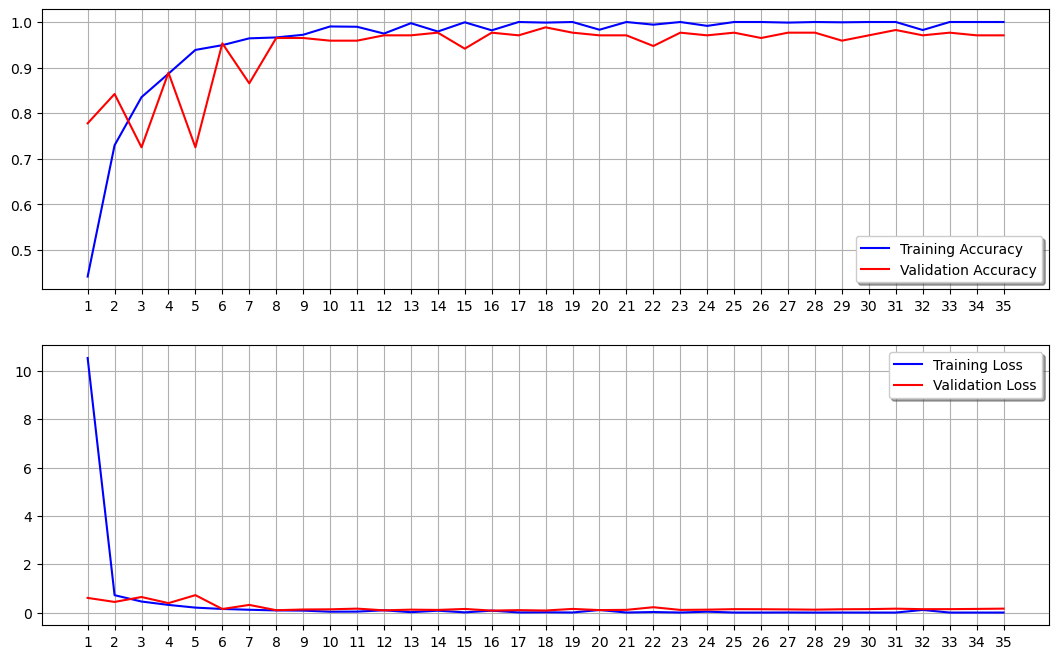

In [4]:
fig, ax=plt.subplots(2,1,figsize=(13,8))
plt.setp(ax, xticks=list(range(1,epochs+1)))

ax[0].plot(list(range(1,epochs+1)),history.history['acc'], color='b', label="Training Accuracy")
ax[0].plot(list(range(1,epochs+1)),history.history['val_acc'], color='r',label="Validation Accuracy")
legend=ax[0].legend(loc='best', shadow=True)
ax[0].grid()

ax[1].plot(list(range(1,epochs+1)),history.history['loss'], color='b', label="Training Loss")
ax[1].plot(list(range(1,epochs+1)),history.history['val_loss'], color='r', label="Validation Loss")
legend=ax[1].legend(loc='best', shadow=True)
ax[1].grid()

In [ ]:
#(2) Tune the CNN and present the best result that you can obtain. Show the test accuracy and the test loss.

In [11]:
# best result
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))
batch_size=32
num_classes=3
epochs=20
model.compile(loss='categorical_crossentropy', metrics=['acc'])
history=model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1)
test_loss, test_accuracy=model.evaluate(X_test, y_test)
print('Accuracy: ', test_accuracy, '\nTest Loss: ', test_loss)

Epoch 1/20
48/48 [==============================] - 68s 1s/step - loss: 7.4318 - acc: 0.5121 - val_loss: 0.5110 - val_acc: 0.8363
Epoch 2/20
48/48 [==============================] - 62s 1s/step - loss: 0.6258 - acc: 0.7590 - val_loss: 0.4596 - val_acc: 0.8596
Epoch 3/20
48/48 [==============================] - 61s 1s/step - loss: 0.4688 - acc: 0.8410 - val_loss: 0.8494 - val_acc: 0.6374
Epoch 4/20
48/48 [==============================] - 63s 1s/step - loss: 0.3540 - acc: 0.8743 - val_loss: 0.4145 - val_acc: 0.8772
Epoch 5/20
48/48 [==============================] - 72s 2s/step - loss: 0.2607 - acc: 0.9127 - val_loss: 0.5163 - val_acc: 0.7953
Epoch 6/20
48/48 [==============================] - 77s 2s/step - loss: 0.1800 - acc: 0.9355 - val_loss: 0.1716 - val_acc: 0.9591
Epoch 7/20
48/48 [==============================] - 76s 2s/step - loss: 0.1497 - acc: 0.9472 - val_loss: 0.8066 - val_acc: 0.6959
Epoch 8/20
48/48 [==============================] - 75s 2s/step - loss: 0.1155 - acc: 0.96

In [13]:
model = Sequential()
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))
batch_size=32
num_classes=3
epochs=20
model.compile(loss='categorical_crossentropy', metrics=['acc'])
history=model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1)
test_loss, test_accuracy=model.evaluate(X_test, y_test)
print('Accuracy: ', test_accuracy, '\nTest Loss: ', test_loss)

Epoch 1/20
48/48 [==============================] - 183s 4s/step - loss: 14.6646 - acc: 0.5055 - val_loss: 0.5331 - val_acc: 0.8480
Epoch 2/20
48/48 [==============================] - 152s 3s/step - loss: 0.7164 - acc: 0.7355 - val_loss: 0.4979 - val_acc: 0.8304
Epoch 3/20
48/48 [==============================] - 152s 3s/step - loss: 0.5636 - acc: 0.7922 - val_loss: 0.5893 - val_acc: 0.7602
Epoch 4/20
48/48 [==============================] - 171s 4s/step - loss: 0.4480 - acc: 0.8489 - val_loss: 0.5685 - val_acc: 0.8246
Epoch 5/20
48/48 [==============================] - 150s 3s/step - loss: 0.3116 - acc: 0.8932 - val_loss: 0.2452 - val_acc: 0.9181
Epoch 6/20
48/48 [==============================] - 149s 3s/step - loss: 0.2354 - acc: 0.9186 - val_loss: 0.1838 - val_acc: 0.9474
Epoch 7/20
48/48 [==============================] - 149s 3s/step - loss: 0.2256 - acc: 0.9244 - val_loss: 0.2527 - val_acc: 0.9240
Epoch 8/20
48/48 [==============================] - 150s 3s/step - loss: 0.1402 - 

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))

batch_size=32
num_classes=3
epochs=10
model.compile(loss='categorical_crossentropy', metrics=['acc'])
history=model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1)
test_loss, test_accuracy=model.evaluate(X_test, y_test)
print('Accuracy: ', test_accuracy, '\nTest Loss: ', test_loss)

Epoch 1/10
48/48 [==============================] - 94s 2s/step - loss: 1.1755 - acc: 0.5101 - val_loss: 0.7940 - val_acc: 0.6784
Epoch 2/10
48/48 [==============================] - 90s 2s/step - loss: 0.4932 - acc: 0.8104 - val_loss: 0.4270 - val_acc: 0.8187
Epoch 3/10
48/48 [==============================] - 90s 2s/step - loss: 0.1958 - acc: 0.9251 - val_loss: 0.2600 - val_acc: 0.8947
Epoch 4/10
48/48 [==============================] - 102s 2s/step - loss: 0.1182 - acc: 0.9609 - val_loss: 0.4313 - val_acc: 0.8889
Epoch 5/10
48/48 [==============================] - 98s 2s/step - loss: 0.0657 - acc: 0.9759 - val_loss: 0.0880 - val_acc: 0.9649
Epoch 6/10
48/48 [==============================] - 114s 2s/step - loss: 0.0952 - acc: 0.9779 - val_loss: 0.0898 - val_acc: 0.9766
Epoch 7/10
48/48 [==============================] - 100s 2s/step - loss: 0.0244 - acc: 0.9883 - val_loss: 0.0563 - val_acc: 0.9825
Epoch 8/10
48/48 [==============================] - 98s 2s/step - loss: 0.0520 - acc: 0

In [5]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))

batch_size=32
num_classes=3
epochs=10
model.compile(loss='categorical_crossentropy', metrics=['acc'])
history=model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1)
test_loss, test_accuracy=model.evaluate(X_test, y_test)
print('Accuracy: ', test_accuracy, '\nTest Loss: ', test_loss)

Epoch 1/10
48/48 [==============================] - 34s 690ms/step - loss: 1.9552 - acc: 0.5564 - val_loss: 0.6796 - val_acc: 0.6901
Epoch 2/10
48/48 [==============================] - 36s 748ms/step - loss: 0.3972 - acc: 0.8560 - val_loss: 0.2817 - val_acc: 0.9064
Epoch 3/10
48/48 [==============================] - 39s 814ms/step - loss: 0.1940 - acc: 0.9251 - val_loss: 0.2567 - val_acc: 0.9123
Epoch 4/10
48/48 [==============================] - 46s 957ms/step - loss: 0.1866 - acc: 0.9466 - val_loss: 0.1329 - val_acc: 0.9708
Epoch 5/10
48/48 [==============================] - 58s 1s/step - loss: 0.0679 - acc: 0.9765 - val_loss: 0.1142 - val_acc: 0.9649
Epoch 6/10
48/48 [==============================] - 66s 1s/step - loss: 0.0553 - acc: 0.9811 - val_loss: 0.6360 - val_acc: 0.8538
Epoch 7/10
48/48 [==============================] - 74s 2s/step - loss: 0.0558 - acc: 0.9844 - val_loss: 0.0872 - val_acc: 0.9766
Epoch 8/10
48/48 [==============================] - 66s 1s/step - loss: 0.0444

In [12]:
model = Sequential()
model.add(Conv2D(128, (5, 5), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))

batch_size=32
num_classes=3
epochs=10
model.compile(loss='categorical_crossentropy', metrics=['acc'])
history=model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1)
test_loss, test_accuracy=model.evaluate(X_test, y_test)
print('Accuracy: ', test_accuracy, '\nTest Loss: ', test_loss)

Epoch 1/10
48/48 [==============================] - 163s 3s/step - loss: 1.1369 - acc: 0.5388 - val_loss: 0.7630 - val_acc: 0.6959
Epoch 2/10
48/48 [==============================] - 159s 3s/step - loss: 0.3671 - acc: 0.8710 - val_loss: 0.2903 - val_acc: 0.9006
Epoch 3/10
48/48 [==============================] - 978s 21s/step - loss: 0.1686 - acc: 0.9427 - val_loss: 0.4113 - val_acc: 0.8129
Epoch 4/10
48/48 [==============================] - 98s 2s/step - loss: 0.1090 - acc: 0.9550 - val_loss: 0.1405 - val_acc: 0.9708
Epoch 5/10
48/48 [==============================] - 853s 18s/step - loss: 0.0828 - acc: 0.9752 - val_loss: 0.0908 - val_acc: 0.9649
Epoch 6/10
48/48 [==============================] - 100s 2s/step - loss: 0.0601 - acc: 0.9785 - val_loss: 0.0945 - val_acc: 0.9708
Epoch 7/10
48/48 [==============================] - 105s 2s/step - loss: 0.0332 - acc: 0.9889 - val_loss: 0.1078 - val_acc: 0.9649
Epoch 8/10
48/48 [==============================] - 147s 3s/step - loss: 0.0251 - 

In [14]:
model = Sequential()
model.add(Conv2D(128, (5, 5), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))

batch_size=32
num_classes=3
epochs=10
model.compile(loss='categorical_crossentropy', metrics=['acc'])
history=model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1)
test_loss, test_accuracy=model.evaluate(X_test, y_test)
print('Accuracy: ', test_accuracy, '\nTest Loss: ', test_loss)

Epoch 1/10
48/48 [==============================] - 211s 4s/step - loss: 2.7363 - acc: 0.4879 - val_loss: 0.7040 - val_acc: 0.6784
Epoch 2/10
48/48 [==============================] - 301s 6s/step - loss: 0.7289 - acc: 0.7147 - val_loss: 0.4446 - val_acc: 0.8304
Epoch 3/10
48/48 [==============================] - 182s 4s/step - loss: 0.5695 - acc: 0.7993 - val_loss: 0.3076 - val_acc: 0.8772
Epoch 4/10
48/48 [==============================] - 240s 5s/step - loss: 0.2677 - acc: 0.9010 - val_loss: 0.1879 - val_acc: 0.9415
Epoch 5/10
48/48 [==============================] - 213s 4s/step - loss: 0.1795 - acc: 0.9375 - val_loss: 0.1453 - val_acc: 0.9649
Epoch 6/10
48/48 [==============================] - 211s 4s/step - loss: 0.0992 - acc: 0.9648 - val_loss: 0.0767 - val_acc: 0.9766
Epoch 7/10
48/48 [==============================] - 121s 3s/step - loss: 0.0833 - acc: 0.9752 - val_loss: 0.1262 - val_acc: 0.9708
Epoch 8/10
48/48 [==============================] - 199s 4s/step - loss: 0.1553 - a